# Shriya Gawade

# PREDICTION USING SUPERVISED ML
Predicting the percentage of a student based on the no. of study hours.


In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\shriy\opencv\Scripts


# Reading Data

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Checking for missing values
missingValues=data.isnull().sum()
print(missingValues)

Hours     0
Scores    0
dtype: int64


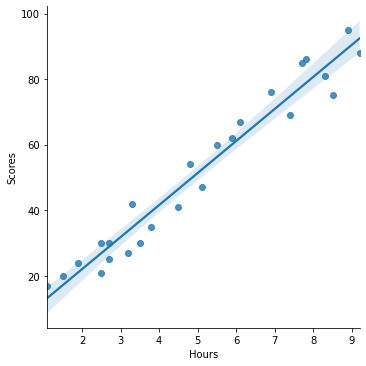

In [8]:
#Plotting the regression line
sns.lmplot(x='Hours',y='Scores',data=data)

# Training and Testing data

In [26]:
X=data.iloc[:, :-1].values    
y=data.iloc[:, 1].values  

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Training the Model

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [35]:
lm.fit(X_train, y_train) 

LinearRegression()

In [36]:
predictions = lm.predict( X_test)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df 

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [48]:
hours=9.25

predict=lm.predict([[hours]])
print('No of hours:',hours)
print('Scores:',predict[0])

No of hours: 9.25
Scores: 92.54521954029958


In [31]:
#Evaluating the model
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.937597792467706
MSE: 26.675642597052256
RMSE: 5.164846812544614
